<a href="https://colab.research.google.com/github/1X-HE/OKOKqm2/blob/main/crime_type_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('MPS Borough Level Crime (most recent 24 months).csv')

# Extract month columns (from 202312 to 202511)
month_columns = [str(col) for col in df.columns if col not in ['MajorText', 'MinorText', 'BoroughName']]
print("Number of month columns:", len(month_columns))

# Group by MajorText and calculate monthly totals
monthly_totals = df.groupby('MajorText')[month_columns].sum()

# monthly average
monthly_averages = monthly_totals.mean(axis=1)
monthly_averages = monthly_averages.sort_values(ascending=False)

result = pd.DataFrame({
    'CrimeType': monthly_averages.index,
    'MonthlyAverage': monthly_averages.values
})

# Display results
print("\n=== Monthly Average Counts by Crime Type ===")
print(result)


# Save results
result.to_csv('crime_monthly_averages.csv', index=False)



Number of month columns: 24

=== Monthly Average Counts by Crime Type ===
                               CrimeType  MonthlyAverage
0                                  THEFT    25355.833333
1            VIOLENCE AGAINST THE PERSON    19982.583333
2                       VEHICLE OFFENCES     7908.958333
3                  PUBLIC ORDER OFFENCES     4713.166667
4              ARSON AND CRIMINAL DAMAGE     4702.833333
5                               BURGLARY     4286.750000
6                          DRUG OFFENCES     3873.041667
7                                ROBBERY     2816.458333
8                        SEXUAL OFFENCES     2175.333333
9   MISCELLANEOUS CRIMES AGAINST SOCIETY      961.083333
10                 POSSESSION OF WEAPONS      481.666667
11                     FRAUD AND FORGERY        6.958333
12                            NFIB FRAUD        0.750000



Finding Borough with Highest Incident Count for Each Crime Type

=== Crime Hotspot Summary ===
THEFT: Highest incidents in Westminster (Total: 111980, Monthly Avg: 25355.8)
VIOLENCE AGAINST THE PERSON: Highest incidents in Croydon (Total: 22509, Monthly Avg: 19982.6)
VEHICLE OFFENCES: Highest incidents in Ealing (Total: 8902, Monthly Avg: 7909.0)
PUBLIC ORDER OFFENCES: Highest incidents in Westminster (Total: 6994, Monthly Avg: 4713.2)
ARSON AND CRIMINAL DAMAGE: Highest incidents in Croydon (Total: 5414, Monthly Avg: 4702.8)
BURGLARY: Highest incidents in Westminster (Total: 5960, Monthly Avg: 4286.8)
DRUG OFFENCES: Highest incidents in Tower Hamlets (Total: 4986, Monthly Avg: 3873.0)
ROBBERY: Highest incidents in Westminster (Total: 7294, Monthly Avg: 2816.5)
SEXUAL OFFENCES: Highest incidents in Westminster (Total: 3089, Monthly Avg: 2175.3)
MISCELLANEOUS CRIMES AGAINST SOCIETY: Highest incidents in Hillingdon (Total: 3323, Monthly Avg: 961.1)
POSSESSION OF WEAPONS: Highest incident

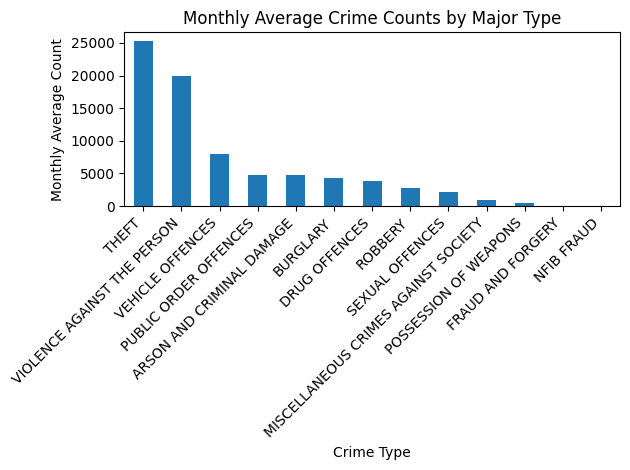

In [9]:
print("\nFinding Borough with Highest Incident Count for Each Crime Type")

# Calculate total incidents for each crime type by borough
crime_totals_by_borough = df.groupby(['MajorText', 'BoroughName'])[month_columns].sum()
crime_totals_by_borough['TotalIncidentsInThisBorough'] = crime_totals_by_borough.sum(axis=1)


# Find borough with maximum incidents for each crime type
max_borough_by_crime = crime_totals_by_borough_reset.loc[
    crime_totals_by_borough_reset.groupby('MajorText')['TotalIncidentsInThisBorough'].idxmax()
]

crime_max_borough = max_borough_by_crime[['MajorText', 'BoroughName', 'TotalIncidentsInThisBorough']]
crime_max_borough.columns = ['CrimeType', 'BoroughWithMostIncidents', 'TotalIncidentsInThisBorough']

# Merge with existing result
enhanced_result = result.merge(crime_max_borough[['CrimeType', 'BoroughWithMostIncidents', 'TotalIncidentsInThisBorough']],
                              on='CrimeType', how='left')

# print("\n=== Enhanced Results with Borough Having Most Incidents ===")


# Display summary of hotspots
print("\n=== Crime Hotspot Summary ===")
for _, row in enhanced_result.iterrows():
    print(f"{row['CrimeType']}: Highest incidents in {row['BoroughWithMostIncidents']} "
          f"(Total: {row['TotalIncidentsInThisBorough']}, Monthly Avg: {row['MonthlyAverage']:.1f})")


# Create bar chart
result.plot(kind='bar', x='CrimeType', y='MonthlyAverage', legend=False)
plt.title('Monthly Average Crime Counts by Major Type')
plt.xlabel('Crime Type')
plt.ylabel('Monthly Average Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

